In [1]:
import sys
sys.path.append('..')

import numpy as np
import torch
import cv2
import matplotlib.pyplot as plt
from src.processing.preprocessing import *

In [2]:
def show_image(img):
    plt.imshow(img, cmap='gray')
    plt.axis('off')

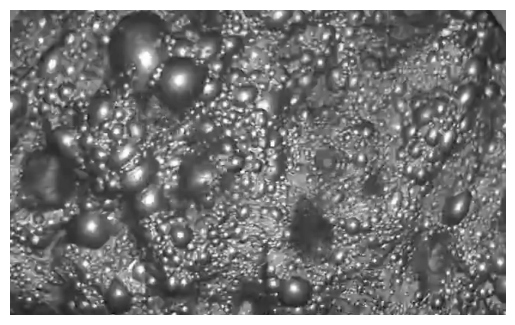

In [3]:
#img = cv2.imread('../data/interim/F1_2_4_1.ts-frames/frame-125.png',0)
img = cv2.imread('../data/interim/F1_2_2_1.ts-frames/frame-40.png', 0)
#img = cv2.imread('../data/interim/F1_2_3_1.ts-frames/frame-205.png',0)
#img = cv2.imread('../data/split/test/F5_1_1_1.ts-frames_frame-265.png', 0)
img = img[100:500, 100:750]
n_img = normalize(img, 0, 1)
show_image(n_img)

(-0.5, 649.5, 399.5, -0.5)

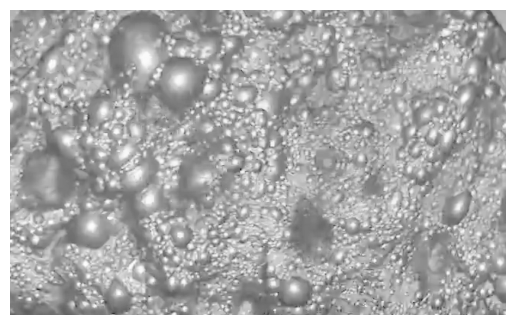

In [4]:
ssr_img = single_scale_retinex(img, 90).astype('float32')
plt.imshow(ssr_img, cmap='gray')
plt.axis('off')

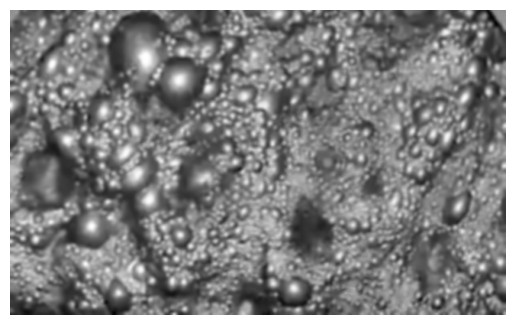

In [5]:
bf = bilateral_filtering(ssr_img, 7, 5, 5)
show_image(bf)

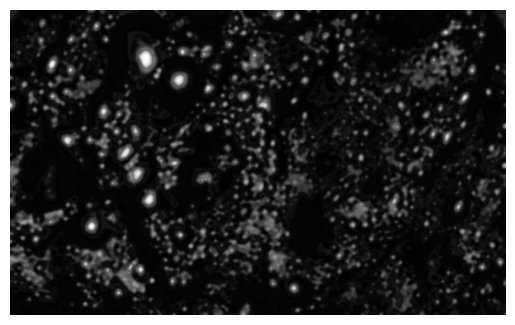

In [6]:
morphed = morphological_transform(bf)
morphed = cv2.GaussianBlur(morphed, (5,5), 0)
show_image(morphed)

In [7]:
m = minmax(morphed.ravel(), [0, 255])
s = minmax(ssr_img.ravel(), [0, 255])
b = minmax(bf.ravel(), [0,255])

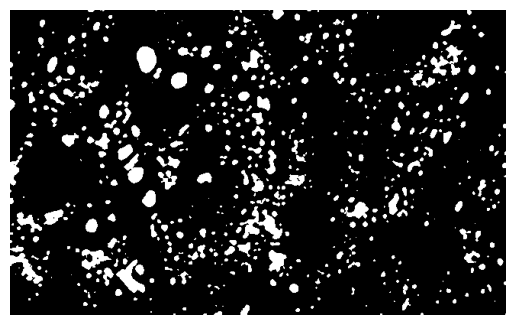

In [8]:
i_m = m.reshape(img.shape).astype('uint8')
_, tr_m = cv2.threshold(i_m, 60, 255, cv2.THRESH_BINARY)
show_image(tr_m)

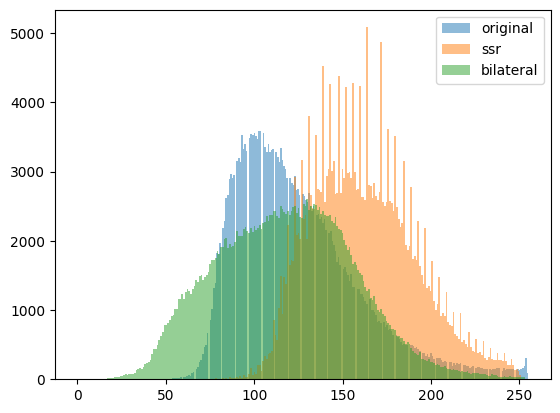

In [9]:
plt.hist(img.ravel(), 256, label="original", alpha=0.5)
plt.hist(s, 256, label="ssr", alpha=0.5)
plt.hist(b, 256, label="bilateral", alpha=0.5)

plt.legend()

164

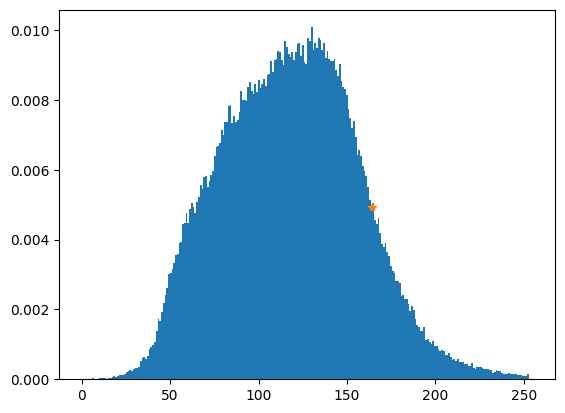

In [10]:
from src.processing.segmentation import get_weighted_otsu_threshold

b_hist, b_bins, _ = plt.hist(b, 256, label="morphed", density=True)
thresh, thresh_array = get_weighted_otsu_threshold(b)
plt.plot(thresh, b_hist[thresh],'*')
thresh

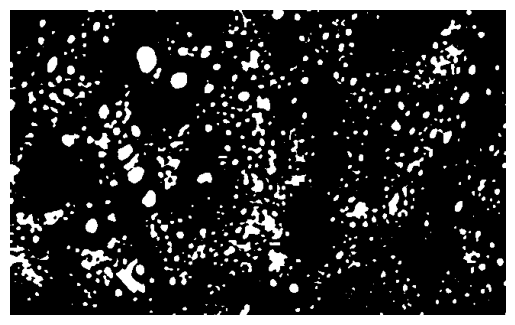

In [11]:
i = b.reshape(img.shape).astype('uint8')
_, tr = cv2.threshold(i, thresh, 255, cv2.THRESH_BINARY)
show_image(tr)

In [12]:
from src.processing.markers import get_markers
from src.processing.contours import get_contours
from src.processing.watershed import perform_watershed

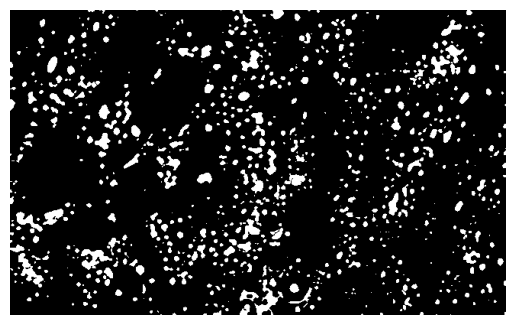

In [13]:
bmkr = get_markers('big', img)
smkr = get_markers('small', img)
mkr = get_markers('all', img)
show_image(smkr)

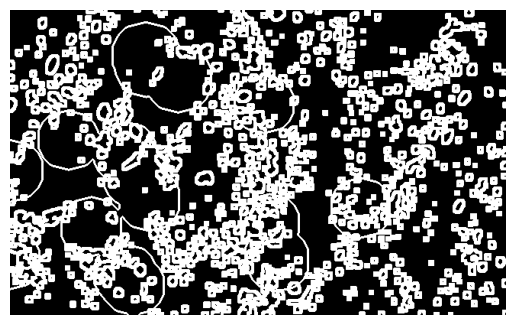

In [14]:
bcnt = get_contours('big', bmkr)
scnt = get_contours('small', smkr)

wcnt = scnt + bcnt
show_image(wcnt)

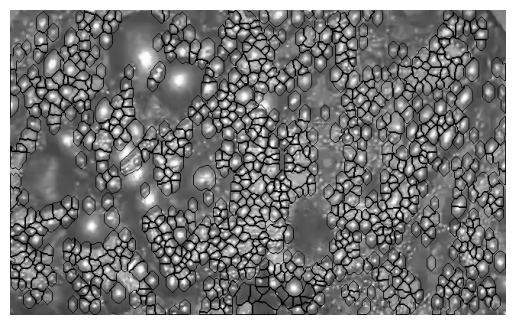

In [15]:
cont_b, res_b = perform_watershed(img.copy())
show_image(cont_b)